# Отчёт по лабораторной работе №2
## по дисциплине Машинное обучение
## "Предварительная обработка данных"
## Вариант 3
## "Вторичный рынок машин"
### Выполнил: Фомин Е. Н.     19-ИВТ-3

**Цель лабораторной работы** – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns           # Для построения карты корреляции
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams      # Для изменения размеров гистрограммы

In [2]:
df_autos = pd.read_csv('autos.csv', encoding='iso-8859-1')
df_original_autos = df_autos

In [3]:
df_autos.info()
df_original_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df_autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


#### Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [5]:
df_autos.drop(['postalCode', 'monthOfRegistration'], axis = 1)    #Удалить столбцы

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,2016-03-24 00:00:00,0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,2016-03-14 00:00:00,0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,0,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein,2016-03-05 00:00:00,0,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein,2016-03-19 00:00:00,0,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,2016-03-24 12:45:21


#### Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [6]:
print("Количество записей до удаления дубликатов и записей с пустыми ячейками:", df_autos.shape[0])

Количество записей до удаления дубликатов и записей с пустыми ячейками: 371528


In [7]:
df_autos.dropna(axis = 0, how ='any', inplace = True)    #Удалить записи с пустыми ячейками
df_autos.drop_duplicates(keep ='first', inplace =True)   #Удалить все дубликаты, кроме одного

In [8]:
# Проверяем, есть ли у нас записи с пропущенными значениями
df_autos.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [9]:
print("Количество записей после удаления дубликатов и записей с пустыми ячейками:", df_autos.shape[0])

Количество записей после удаления дубликатов и записей с пустыми ячейками: 260952


#### Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.

In [10]:
print("Количество записей до:", df_autos.shape[0])

Количество записей до: 260952


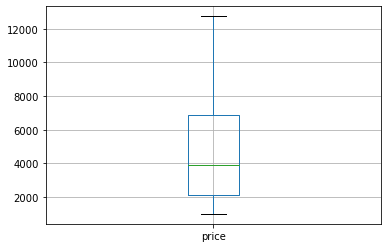

In [11]:
quan1 = df_autos['price'].quantile(0.15)
quan2 = df_autos['price'].quantile(0.85)

df_autos[(df_autos['price'] > quan1) & (df_autos['price'] < quan2)].boxplot(column=['price'])
df_autos = df_autos[(df_autos['price'] > quan1) & (df_autos['price'] < quan2)]

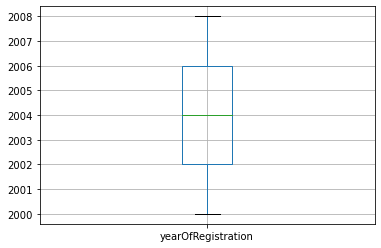

In [12]:
quan1 = int(df_autos['yearOfRegistration'].quantile(0.15))
quan2 = int(df_autos['yearOfRegistration'].quantile(0.85))

df_autos[(df_autos['yearOfRegistration'] > quan1) & (df_autos['yearOfRegistration'] < quan2)].boxplot(column=['yearOfRegistration'])
df_autos = df_autos[(df_autos['yearOfRegistration'] > quan1) & (df_autos['yearOfRegistration'] < quan2)]

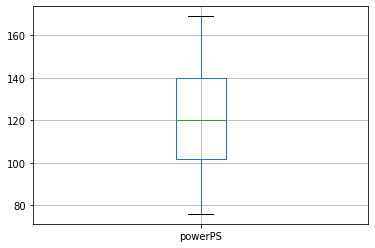

In [13]:
quan1 = df_autos['powerPS'].quantile(0.15)
quan2 = df_autos['powerPS'].quantile(0.85)

df_autos[(df_autos['powerPS'] > quan1) & (df_autos['powerPS'] < quan2)].boxplot(column=['powerPS'])
df_autos = df_autos[(df_autos['powerPS'] > quan1) & (df_autos['powerPS'] < quan2)]

In [14]:
print("Количество записей после:", df_autos.shape[0])

Количество записей после: 70916


#### Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

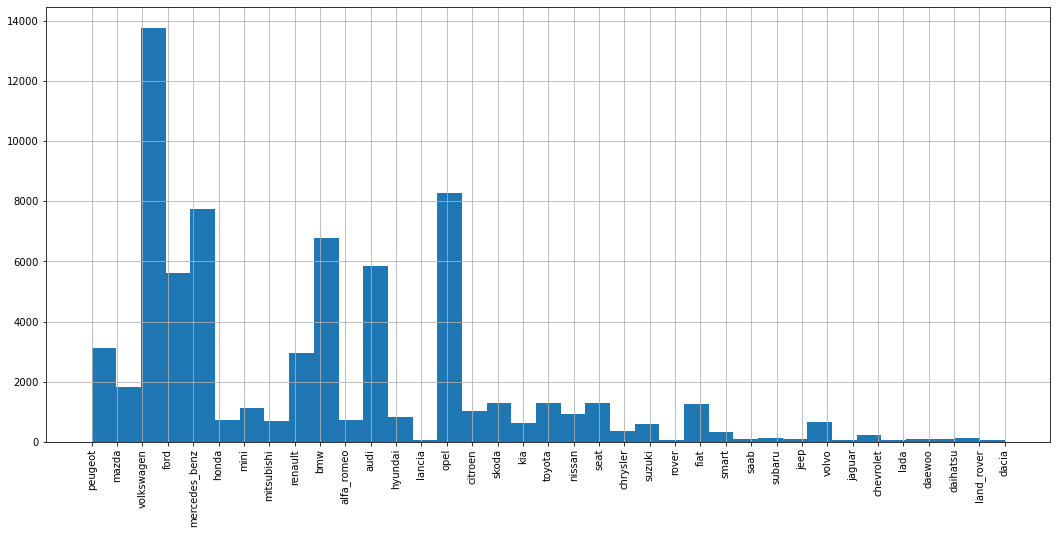

In [15]:
rcParams['figure.figsize'] = 18, 8
df_autos.brand.hist(bins = len(df_autos.brand.unique()))
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

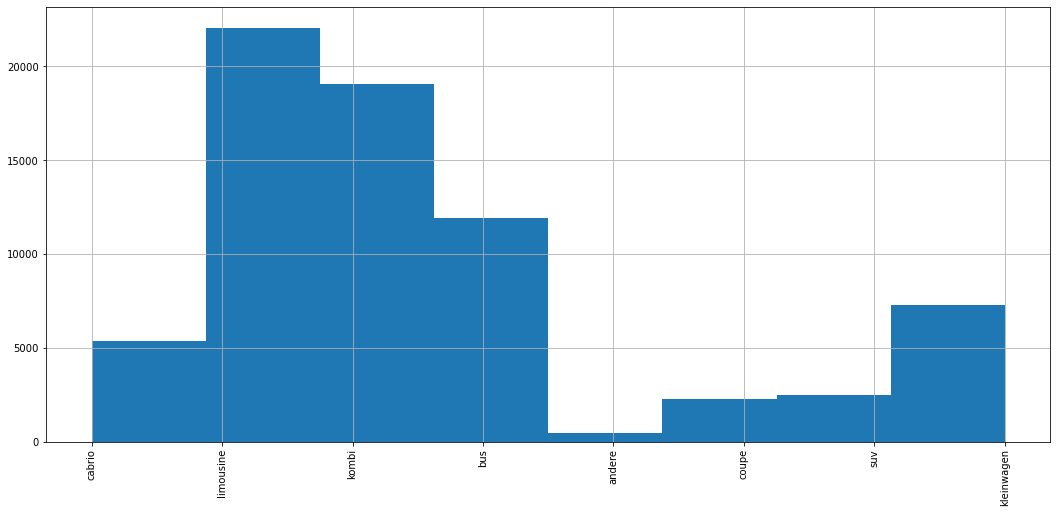

In [16]:
rcParams['figure.figsize'] = 18, 8
df_autos.vehicleType.hist(bins = len(df_autos.vehicleType.unique()))
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

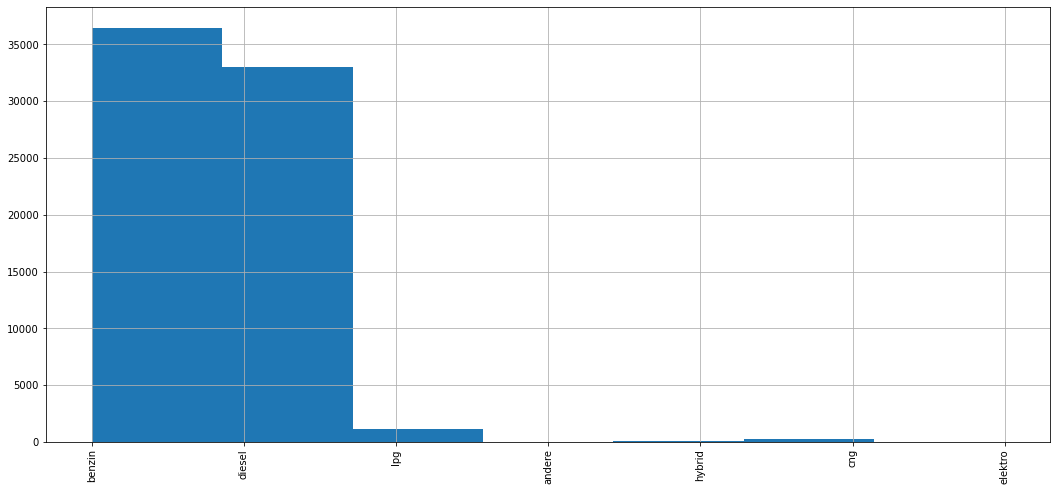

In [17]:
rcParams['figure.figsize'] = 18, 8
df_autos.fuelType.hist(bins = len(df_autos.fuelType.unique()))
plt.xticks(rotation = 90)

#### Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [18]:
df_autos['nameLength'] = df_autos['name'].apply(len)
df_autos.head()    #Выводит первые 5 записей

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,nameLength
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,27
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,...,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34,17
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,...,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,45
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,bus,2007,manuell,136,...,150000,6,diesel,ford,nein,2016-03-23 00:00:00,0,88361,2016-04-05 18:45:11,32
19,2016-04-01 22:55:47,Mercedes_Benz_A_160_Classic_Klima,privat,Angebot,1850,test,bus,2004,manuell,102,...,150000,1,benzin,mercedes_benz,nein,2016-04-01 00:00:00,0,49565,2016-04-05 22:46:05,33


In [19]:
df_autos.tail()    #Выводит последние 5 записей

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,nameLength
371506,2016-03-20 18:47:59,Volkswagen_Golf_1.9_TDI_DPF_Goal_Rentnerfzg._1...,privat,Angebot,5900,test,limousine,2006,manuell,105,...,150000,9,diesel,volkswagen,nein,2016-03-20 00:00:00,0,1217,2016-04-07 02:44:27,50
371508,2016-04-02 16:43:27,Opel_Astra_1.8,privat,Angebot,1400,control,limousine,2001,manuell,125,...,150000,2,benzin,opel,nein,2016-04-02 00:00:00,0,23820,2016-04-06 15:18:04,14
371510,2016-03-06 21:11:23,Mercedes_benz_e_klasse_avangarde_220_cdi_grune...,privat,Angebot,6500,test,limousine,2003,automatik,145,...,150000,3,diesel,mercedes_benz,nein,2016-03-05 00:00:00,0,60437,2016-03-12 12:18:05,54
371513,2016-03-21 15:36:22,Seat_Leon_1.9_TDI_4/5_Tueren,privat,Angebot,4400,control,limousine,2008,manuell,105,...,150000,7,diesel,seat,nein,2016-03-21 00:00:00,0,45896,2016-04-06 15:45:01,28
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12,37


#### Постройте карту корреляций между признаками.

In [20]:
df_autos.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,nameLength
price,1.000000,0.586148,0.320600,-0.266972,0.058685,NaN,0.040633,0.093070
yearOfRegistration,0.586148,1.000000,-0.000202,-0.226001,0.026664,NaN,0.024824,0.068587
powerPS,0.320600,-0.000202,1.000000,0.149884,-0.005044,NaN,0.032073,0.049784
kilometer,-0.266972,-0.226001,0.149884,1.000000,-0.019689,NaN,0.001185,0.008851
monthOfRegistration,0.058685,0.026664,-0.005044,-0.019689,1.000000,NaN,-0.001489,0.026637
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,0.040633,0.024824,0.032073,0.001185,-0.001489,NaN,1.000000,-0.068709
nameLength,0.093070,0.068587,0.049784,0.008851,0.026637,NaN,-0.068709,1.000000


<AxesSubplot:>

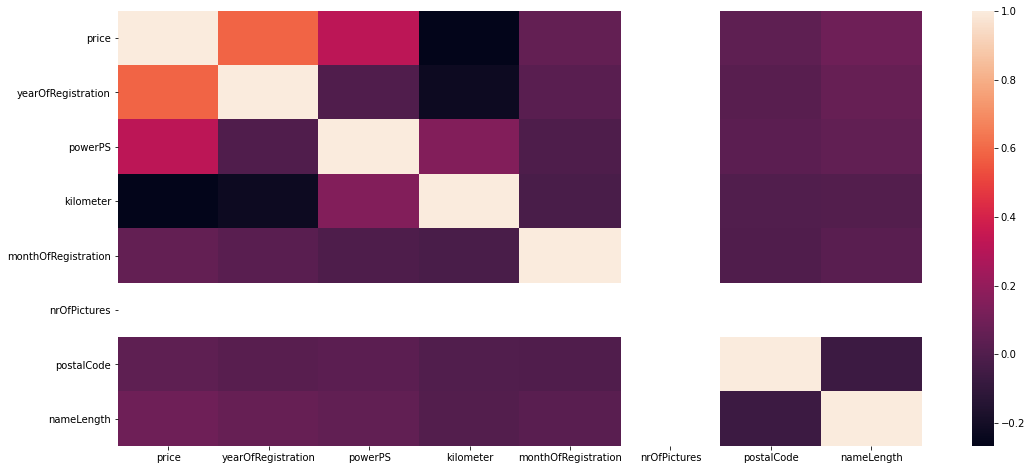

In [21]:
sns.heatmap(df_autos.corr())

#### Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Постройте плотность распределения признака.

In [22]:
encoder = LabelEncoder()
df_autos['num_vehicleType'] = encoder.fit_transform(df_autos['vehicleType'])

С помощью Pandas

In [23]:
df_autos.corr(method = 'spearman')['price']['num_vehicleType']

-0.0021786277311282467

In [24]:
df_autos.corr(method = 'pearson')['price']['num_vehicleType']

-0.037602556696397706

С помощью Scipy

In [25]:
corr_p = pearsonr(df_autos['price'], df_autos['num_vehicleType'])
print(corr_p)
corr_s = spearmanr(df_autos['price'], df_autos['num_vehicleType'])
print(corr_s)

(-0.037602556696403305, 1.284062260082308e-23)
SpearmanrResult(correlation=-0.0021786277311282467, pvalue=0.5618065264036987)


<AxesSubplot:ylabel='Density'>

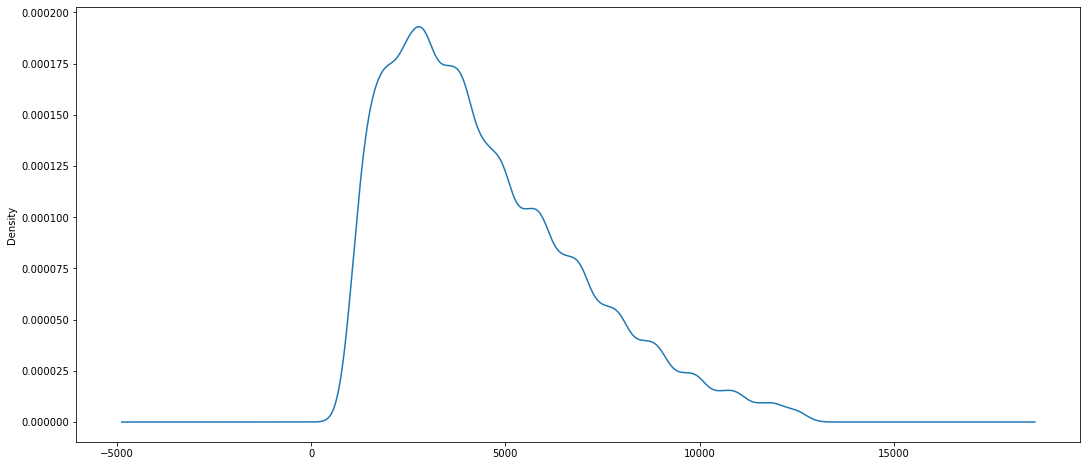

In [26]:
df_autos['price'].plot.kde()

#### Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [27]:
df_autos['powerPS_plus_kilometer'] = df_autos['powerPS'] + df_autos['kilometer']     #Добавление столбца с суммой двух признаков

In [28]:
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,nameLength,num_vehicleType,powerPS_plus_kilometer
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,27,2,150109
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,...,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34,17,6,150105
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,...,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,45,5,150140
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,bus,2007,manuell,136,...,diesel,ford,nein,2016-03-23 00:00:00,0,88361,2016-04-05 18:45:11,32,1,150136
19,2016-04-01 22:55:47,Mercedes_Benz_A_160_Classic_Klima,privat,Angebot,1850,test,bus,2004,manuell,102,...,benzin,mercedes_benz,nein,2016-04-01 00:00:00,0,49565,2016-04-05 22:46:05,33,1,150102


In [29]:
df_autos.info()
df_original_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70916 entries, 6 to 371524
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   dateCrawled             70916 non-null  object
 1   name                    70916 non-null  object
 2   seller                  70916 non-null  object
 3   offerType               70916 non-null  object
 4   price                   70916 non-null  int64 
 5   abtest                  70916 non-null  object
 6   vehicleType             70916 non-null  object
 7   yearOfRegistration      70916 non-null  int64 
 8   gearbox                 70916 non-null  object
 9   powerPS                 70916 non-null  int64 
 10  model                   70916 non-null  object
 11  kilometer               70916 non-null  int64 
 12  monthOfRegistration     70916 non-null  int64 
 13  fuelType                70916 non-null  object
 14  brand                   70916 non-null  object
 15  n